In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
len(train_df.columns)

12

In [9]:
categorical_values=train_df.dtypes=='object'
cat_=list(categorical_values[categorical_values].index)
print("categorical values: ",cat_)
print("Total Categorical Values: ",len(cat_))

categorical values:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Total Categorical Values:  5


In [10]:
numerical_values=train_df.dtypes=='int64'
num_=list(numerical_values[numerical_values].index)
num_float=train_df.dtypes=='float64'
float_=list(num_float[num_float].index)
print('Numerical values: ',num_," ",float_ )
print("Total Numerical Values: ", len(num_)+len(float_))

Numerical values:  ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']   ['Age', 'Fare']
Total Numerical Values:  7


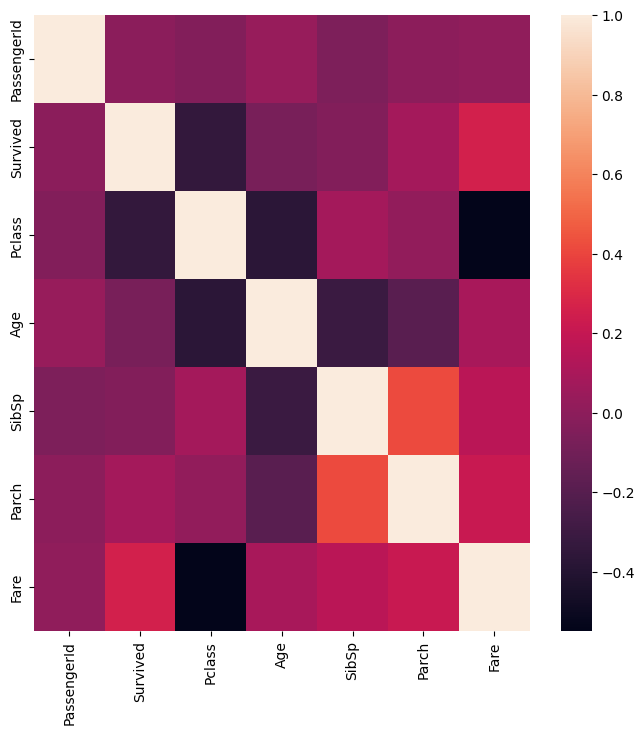

In [11]:

heat_map_values=train_df.drop(columns=cat_)
heat_map_values

plt.figure(figsize=(8,8))
sns.heatmap(heat_map_values.corr())
plt.show()


In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

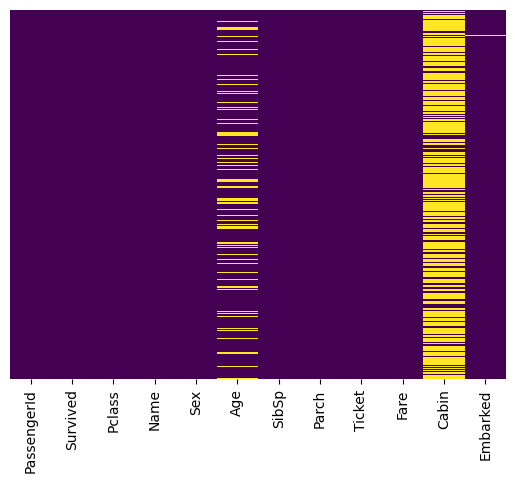

In [13]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [14]:
# Handling missing values

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

train_df.drop(columns='Cabin', inplace=True)


C:\Users\shash\AppData\Local\Temp\ipykernel_2204\4109052990.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_2204\4109052990.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

<Axes: >

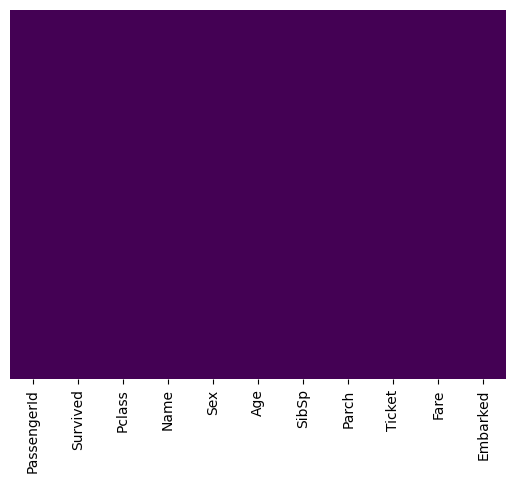

In [15]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [16]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [19]:
train_df['Sex']=train_df['Sex'].map({'male':0, 'female':1})
train_df['Embarked']=train_df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [20]:
# Remove Unnecessary Columns

train_df.drop(columns=['Name', 'Ticket', 'PassengerId', 'Embarked'], inplace=True)

In [21]:
from sklearn.model_selection import train_test_split

X=train_df.drop(columns=['Survived'])

Y=train_df['Survived']

X_train_split, X_valid, Y_train_split, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)



In [22]:
X_train_split.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [23]:
print(train_df['Age'].dtypes)

float64


In [24]:
X_train_split.shape

(712, 6)

In [25]:
Y_train_split.shape

(712,)

In [26]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(X_train_split, Y_train_split)



LogisticRegression()

In [27]:
predictions=model.predict(X_valid)


In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_valid, predictions)

0.8100558659217877

In [29]:
from sklearn.metrics import classification_report

print(classification_report(Y_valid, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [30]:
#Testing the model on whole Test CSV file

test_df.drop(columns=['Name', 'Ticket', 'PassengerId', 'Embarked'], inplace=True)


In [31]:
test_df.drop(columns=['Cabin'], inplace=True)

In [32]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

C:\Users\shash\AppData\Local\Temp\ipykernel_2204\1811889073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)


In [33]:
test_df['Sex']=test_df['Sex'].map({'male':0, 'female':1})

In [34]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [35]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

C:\Users\shash\AppData\Local\Temp\ipykernel_2204\4271572204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [36]:
testcsv_preds=model.predict(test_df)

In [37]:
for i in testcsv_preds:
  print(i)

0
0
0
0
1
0
1
0
1
0
0
0
1
0
1
1
0
0
1
1
0
0
1
1
1
0
1
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
0
1
1
0
0
1
1
0
0
0
0
0
1
0
0
0
1
1
1
1
0
0
1
1
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
0
1
1
0
1
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
1
0
0
1
0
0
1
1
0
1
1
0
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
0
0
1
0
1
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
1
1
0
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
0
0
1
0
1
0
0
1
0
1
1
0
1
0
0
1
1
0
0
1
0
0
1
1
1
0
0
0
0
0
1
1
0
1
0
0
0
0
1
1
0
0
0
1
0
1
0
0
1
0
1
1
0
0
0
0
1
1
1
1
1
0
1
0
0
0
